**Discrete Random Variable**

A **random variable** is a real-valued function of a probabilistic sample space. It is **discrete** if it's range is *finite* or countably infinite, i.e. if a one-to-one correspondance can be created between it's range and the positive integers.

A discrete random variable has an associated **probability mass function** (PMF) (aka probability distribution function) that gives the probability of each range value for the random variable. If *x* is any real number, the **probability mass** of *x* is the probability of the event $\left\{X=x\right\}\hspace{1pt}$ consisting of all outcomes that give rise to the value *x* for *X* and is denoted

$$p_X\left(x\right) = P\left(\left\{X=x\right\}\right)$$

The PMF of a random variable *X* can be calculated as follows:

For each possible value *x* of *X*:

1. Collect all possible disjoint events in $\Omega\hspace{1pt}$ that give rise to the event $\left\{X=x\right\}\hspace{1pt}$

2. Add their probabilities to obtain $p_X\left(x\right)$

3. Repeat for all *x*

**Functions of Random Variables**

If $Y=g\left(X\right)\hspace{1pt}$ is a function of a random variable *X*, then *Y* is also a random variable. If *X* is discrete with PMF $p_X\hspace{1pt}$, then *Y* is also discrete and its PMF is 

$$p_Y\left(y\right) = \sum_{\{x \hspace{1pt}\vert \hspace{1pt} g\left(x\right)=y\}} p_x\left(x\right)$$

**Expectation (Mean)**

The **expected** value, or mean, of a random variable *X* with PMF $p_X\hspace{1pt}$ is defined as

$$E\left[X\right] = \sum_x x p_X\left(x\right)$$

Note that the expectation is well-defined only if 

$$\sum_x \left| x \right| p_X \left(x\right) \lt \infty$$

This fails to hold for certain distributions. For example, consider a power law PMF of the form $p_X\left(x\right) = \frac{1}{x^{\alpha+1}}\hspace{1pt}$ with $\alpha\le1$ for $x$ any positive integer. Then the expected value,$\sum_{n=1}^{\infty}\frac{1}{x^{\alpha}}$ is a divergent <a href=https://en.wikipedia.org/wiki/Harmonic_series_(mathematics)#p-series>p-series</a>.

**Expected Value of Functions of Random Variables**

Let *X* be a random variable with PMF $p_X\hspace{1pt}$ and let $g\left(X\right)\hspace{1pt}$ be a function of *X*. Then the expected value of the random variable $Y=g\left(X\right)\hspace{1pt}$ is 

$$E\left[Y\right]=E\left[g\left(X\right)\right] = \sum_x g\left(x\right) p_X \left(x\right)$$

**Note** that unless $g\left(X\right)\hspace{1pt}$ is a linear function, it is **not** generally true that $E\left[g\left(X\right)\right] = g\left(E\left[X\right]\right)\hspace{1pt}$. This is illustrated in the following example.

*Example*
Problem 21 page 123 of [1]. Assume you toss a fair coin until the first tails appears at say toss *n* and that you receive $2^n\hspace{1pt}$ dollars as a reward. What is the expected about of your winnings? How much would you pay to play the game?

Let the RV *X* be the amount you receive as a reward. Let the RV *N* be the number of tosses up to an including the first tail. Then we have $X=g\left(N\right)=2^N\hspace{1pt}$. We know that *N* can be represented as a geometric random variable with PMF, with $p=\frac{1}{2}$ assuming a fair coin

$$P_N\left(n\right) = \left(\frac{1}{2}\right)^n$$

with expected value

$$E\left[N\right] = \sum_{n=1}^{\infty}n\left(\frac{1}{2}\right)^n = \frac{1}{p} = 2$$

and it is *tempting, but wrong*, to argue that the expected reward is $2^{E\left[N\right]}=2^2=4\hspace{1pt}$. But such an argument assumes that 

$$E\left[g\left(N\right)\right]=E\left[2^N\right]=2^{E\left[N\right]}=g\left(E\left[N\right]\right)$$

which is not true. Consider again the RV X. It takes on values $2^0, 2^1, 2^2, \ldots\hspace{1pt}$, i.e. values $2^n\hspace{1pt}$ for any integer *n*. Noting that a particular outcome occurs with the same probability as obtaining the first tails on the $n^{th}$ toss, the expected value is 

$$E\left[X\right] = \sum_{k=0}^{\infty}2^k 2^{-k} = \infty$$

So it is argued that the expected, or mean payout is infinite, implying that one should pay **any** amount to play this game. However, it is **more accurate to state that the expected value is undefined** and so too is the variance. Several researchers have presented alternative risk assesments for determining a fair *entrance* fee for this game - try a quick Google search. Below are simulated outcomes:

Max payout = 16384


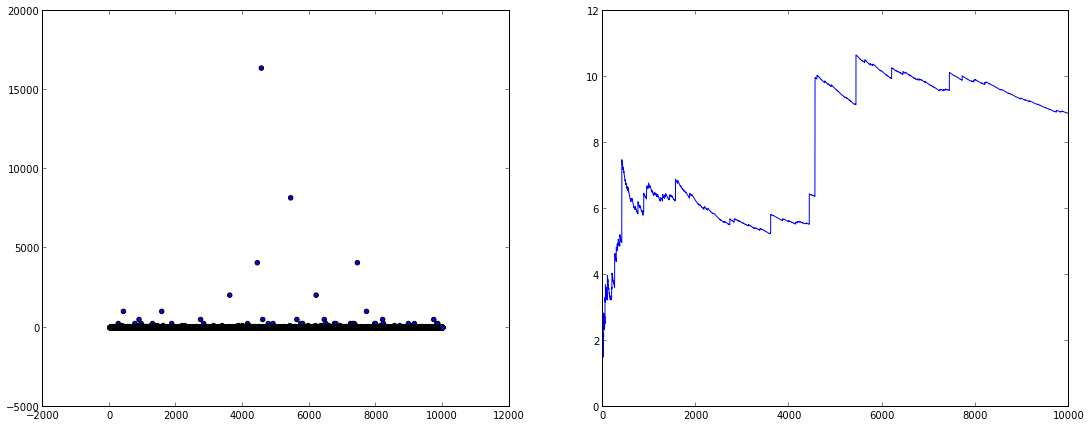

In [14]:
games = 10000
p = 0.5 #use a fair coin

def playGame(p, n=0):
    r = numpy.random.rand()
    if r<=p: return n
    else: return playGame(p,n+1)
    
payouts = [2**playGame(p=p, n=0) for i in range(games)]
cumAvg = numpy.cumsum(payouts)
cumAvg = [cumAvg[i]/float((i+1)) for i in range(games)]

f,axarr = pyplot.subplots(1,2)
f.subplots_adjust(right=2.5)
f.subplots_adjust(top=1.5)
axarr[0].scatter(range(games),payouts)
axarr[1].plot(cumAvg)

print "Max payout = {0}".format(max(payouts))

**Higher Order Moments**

The expected value is special case of the more general notion of the $n^{th}$ **moment** of a random variable $X$, defined as

$$E\left[X\right] = \sum_x x^n p_X\left(x\right)$$

where again this is only well defined if 

$$\sum_x \left| x^n \right| p_X \left(x\right) \lt \infty$$

As with the mean, this condition can fail for certain distributions. Consider the power law PMF described previously. All moments, *m*, such that $m\ge\alpha\hspace{1pt}$ fail to satisfy this condition.

**Variance**

The **variance** of a random variable, denoted $var\left(X\right)\hspace{1pt}$ is defined as the expected value of the random variable $\left(X - E\left[X\right]\right)^2\hspace{1pt}$ and the following identities hold

$$\begin{eqnarray}var\left(X\right) &=& E\left[\left(X-E\left[X\right]\right)^2\right] \cr
        &=& \sum_x\left(x-E\left[X\right]\right)^2 p_X\left(x\right) \cr
        &=& E\left[X^2\right] - \left(E\left[X\right]\right)^2
\end{eqnarray}$$

The variance is a measure of the expected value of the square of difference between an arbitrary observation of a RV and the mean of that RV.  

The **standard deviation**, $\sigma_X\hspace{1pt}$, is defined as the square root of the variance.

**Linear Function of a Random Variable**

Let *X* be a random variable and let $Y=aX+b\hspace{1pt}$ for scalars *a* and *b*. Then

$$E\left[Y\right] = a E\left[X\right] + b$$

and 

$$var\left(Y\right) = a^2var\left(X\right)$$

**Joint PMFs of Multiple Random Variables**

Consider two discrete random variables *X* and *Y*. The probabilities of the pairs $\left(x,y\right)\hspace{1pt}$ that the *X* and *Y* can take are described by the **joint PMF** denoted $p_{X,Y}$

$$p_{X,Y}\left(x,y\right) = P\left(X=x,Y=y\right)$$

From the joint PMF, the PMF of *X* or *Y* can be obtained as

$$p_X\left(x\right) = \sum_y p_{X,Y}\left(x,y\right) \quad p_Y\left(y\right) = \sum_x p_{X,Y}\left(x,y\right)$$

where here $p_X\hspace{1pt}$ and $p_Y\hspace{1pt}$ are referred to as the **marginal PMFs**, though their meaning and values are exactly the same as the standard PMF of the single variables $X$ and $Y$. The term *marginal* simply distinguishes them from the full joint PMF.

Naturally, these notions can be extended to any number of discrete random variables $X_1, \ldots, X_n\hspace{1pt}$ with joint PMF

$$p_{X_1,\ldots,X_n}\left(x_1,\ldots,x_n\right) = P\left(X_1=x_1,\ldots,X_n=x_n\right)$$

For any $X_i\hspace{1pt}$ let $X_1, \ldots, X_{n-1}$ be the remaining random variables from $X_1, \ldots, X_n$ the PMF of $X_i\hspace{1pt}$ is 

$$p_{X_i}\left(x\right) = \sum_{x_1}\ldots\sum_{x_{n-1}}p_{X_1\ldots,X_n}\left(x_1,\ldots,x_{n-1}\right)$$

**Functions of Multiple Random Variables**
A function $Z=g\left(X,Y\right)\hspace{1pt}$ of the random variables *X* and *Y* is a random varibale with PMF

$$p_Z\left(z\right) = \sum_{\left\{ \left(x,y\right) \vert g\left(x,y\right)=z\right\}} p_{X,Y}\left(x,y\right)$$

The expected value of *Z* is

$$E\left[g\left(X,Y\right)\right] = \sum_x\sum_y g\left(x,y\right) p_{X,Y}\left(x,y\right) $$

These notions can be extended to any number of discrete random variables. Let $\bar{X_s} = \left\{X_1,\ldots,X_n\right\}\hspace{1pt}$ be a set of discrete random variables with joint PMF $p_{\bar{X_s}}\hspace{1pt}$. Let *Z* be the random variable defined by $Z=g\left(\bar{X_s}\right)\hspace{1pt}$, then *Z* has PMF

$$p_Z(z) = \sum_{\left\{\left(x_1,\ldots,x_n\right) \hspace{2pt}\vert \hspace{2pt} g\left(x_1,\ldots,x_n\right)=z\right\}} p_{\bar{X_s}}\left(x_1,\ldots, x_n\right)$$

and the expected value of *Z* is

$$E\left[Z\right] = E\left[g\left(\bar{X_s}\right)\right] = \sum_{x_1}\ldots\sum_{x_n}g\left(x_1,\ldots,x_n\right)p_{\bar{X_s
}}\left(x_1,\ldots,x_n\right)$$

**Conditioning a RV on another RV**

Let *X* and *Y* be two random variables. The **conditional PMF** of *X* given *Y* is 

$$p_{X\vert Y} \left(x \vert y \right) = 
\frac {P\left( X=x,Y=y \right)} {P\left( Y=y \right)} = 
\frac{P \left( \left\{ X=x \right\} \cap \left\{ Y=y \right\} \right)} {P\left( \left\{Y=y\right\} \right)}
= \frac{p_{X,Y}\left(x,y\right)}{p_Y\left(y\right)}$$

The conditional probability is itself a valid probability model and satisfies

$$\sum_x p_{X\vert Y} \left(x\vert y\right) = 1$$

**Conditional Expectation**

Let *X* and *Y* be random variables. The conditional expectation of *X* given *Y=y* is 

$$E\left[X\vert Y =y\right] = \sum_x x p_{X \vert Y}\left(x \vert y\right)$$

**Total Expectation Theorem**
If $A_1,\ldots,A_n\hspace{1pt}$ is a disjoint partition of the sample space with $P\left(A_i\right)>0$ for all *i* then

$$E[X] = \sum_i^n P\left(A_i\right) E\left[X\vert A_i \right]$$

In words, this states that expected value of *X* is a weighted average of the expected values of *X* under the events $A_i\hspace{1pt}$ where the weights are the probability of the events $A_i\hspace{1pt}$ provided they form a partition of the sample space.

For any event *B* with $P\left(A_i \cap B\right) > 0 \hspace{1pt}$ for all *i*, we have

$$E\left[X\vert B \right] = \sum_{i=1}^n P \left( A_i \vert B \right) E \left[X \vert A_i \cap B \right]$$

where this has a similar interpretation as a weighted average of the expected values of *X* under the events  $A_i \cap B\hspace{1pt}$. Finally, we also have

$$ E \left[X \right] = \sum_y p_Y\left( y \right) E\left[X \vert Y=y \right]$$

which can also be intrepreted as stating that the expected value of *X* is a weighted average of the conditional expectation of *X* conditioned on *Y* where the weights are the PMF of *Y*.

**Example**

Problem 33 page 128 of [1]. 

A coin that has probability of heads equal to *p* is tossed successively and independently until a head or tails comes twice in a row. Find the exepcted value of the number of tosses.

As shown in the text, the *total expectation theorem* can be used to obtain the solution

$$E\left[X\right] = \frac{2+pq}{1-pq}$$

where $q=1-p\hspace{1pt}$. 

In particular, note that the expected value is bounded, $2\le E\left[X\right]\le 3\hspace{1pt}$. This is observed in the simulations below:

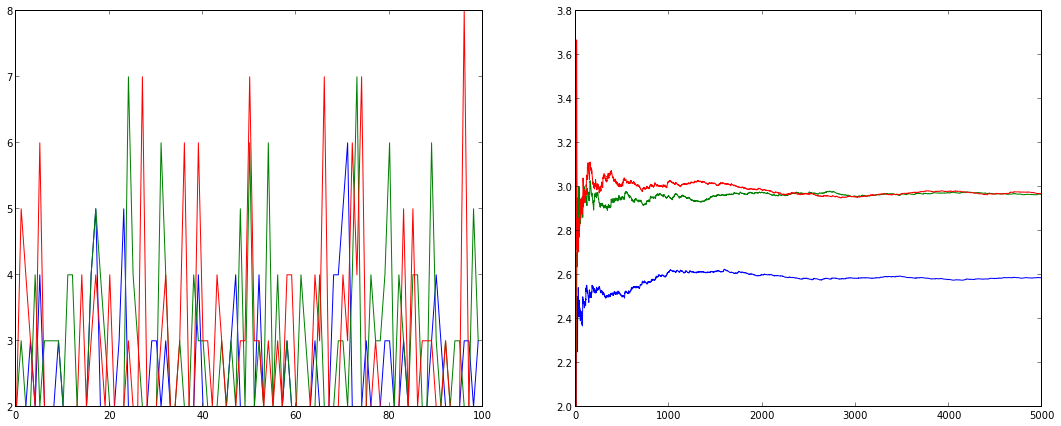

In [11]:
pValues = [0.2*(i+1) for i in range(3)]
numGames = 5000

def playGame(p, count = 0, lastToss = -1):
    heads = numpy.random.rand()<=p
    if lastToss == -1: return playGame(p,count+1, heads)
    if (lastToss and heads) or (not lastToss and not heads): return count + 1
    else: return playGame(p, count+1, heads)
    
rslts = []
for p in pValues:
    rslt = []
    for g in range(numGames):
        rslt.append(playGame(p))
    rslts.append(rslt)

cumAvgs = []
for r in rslts:
    cumSum = numpy.cumsum(r)
    cumAvgs.append([cumSum[i]/float((i+1)) for i in range(numGames)])

f,axarr = pyplot.subplots(1,2)
f.subplots_adjust(right=2.5)
f.subplots_adjust(top=1.5)
for r in rslts: axarr[0].plot(range(min(100,numGames)),r[0:min(100,numGames)])
for ca in cumAvgs: axarr[1].plot(range(numGames), ca)    

**Independence of Random Variables**

Two random variables *X* and *Y* are **independent** if

$$p_{X,Y} \left(x,y\right) = p_X \left(x\right) p_Y \left(y\right) \quad \forall \hspace{2pt} x,y$$

which is equivalent to requiring that the events $\left\{X=x\right\}\hspace{1pt}$ and $\left\{Y=y\right\}\hspace{1pt}$ are independent **for all** combinations of *x* and *y*. This concept can be extended to any number of random variables, that is the set of random variables $X_1,\ldots,X_n\hspace{1pt}$ are independent if

$$P_{X_1,\ldots,X_n} \left(x_1,\ldots,x_n\right) = p_{X_1}\left(x_1\right) \ldots p_{X_n}\left(x_n\right) \quad \forall \hspace{2pt} x_1,\ldots,x_n$$

Notice that unlike the case of independent **events** we do not explicitly require the sub-conditions of independence of all the different combinations of the random variables. In fact, these conditions are embedded in the given condition because it must hold for all $x_1,\ldots,x_n\hspace{1pt}$.

*X* and *Y* are said to **conditionally independent** given an event *A* if

$$p_{X,Y \vert A} \left(x,y\right) = p_{X\vert A}\left(x\right) p_{Y \vert A}\left(y\right) \quad \forall \hspace{2pt} x,y$$

If $X_1,\ldots,X_n$ are independent

$$var\left(X_1 + \ldots + X_n\right) = var\left(X_1\right) + \ldots var\left(X_n\right)$$

i.e. the variance of the sum of **independent** random variables is equal to the sum of the variances.